# Data Science with Python Assessment Project 1
## California Housing

Project Objective:
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Project Done & Submitted By: Prakhar Prasad

In [432]:
#Ensure the right versions and environment are being used
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= '0.20'

## Import libraries

In [433]:
#commmon imports
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

## Load and Understand the data

In [434]:
#load the dataset &check the top 5 rows
df = pd.read_excel('1553768847_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [435]:
#check the columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [436]:
#check the shape -- > #rows and #columns
df.shape

(20640, 10)

There are totally 20640 rows and 10 columns. 9 of these are the features while there is one target column named $'median house value'$

In [437]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


We can see that total_bedrooms has a few missing rows. Rest all of the rows appear to be complete. 
There is 1 categorical variable called as Ocean Proximity which has a datatype as object. 

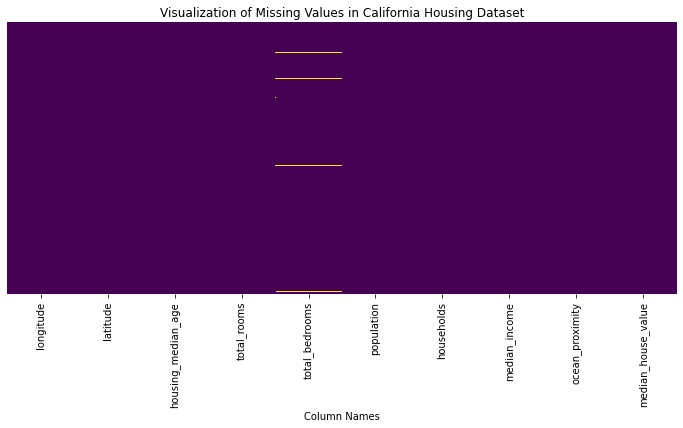

In [438]:
#visualize the missing values using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Visualization of Missing Values in California Housing Dataset')
plt.xlabel('Column Names')
#save the figure for later communication
plt.savefig('Visualize_Missing_Values.png',dpi=300)
#show the plot
plt.show()

We can clearly see that the colun total_bedrooms has these missing values which are indicated by the horizontal lines.

In [439]:
#check basic statistics of all the columns
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observations:
- The scale of the features are very different
- The median age of the houses is ~28 years
- Exploratory data analysis would provide more insights into the data

## Exploratory Data Analysis

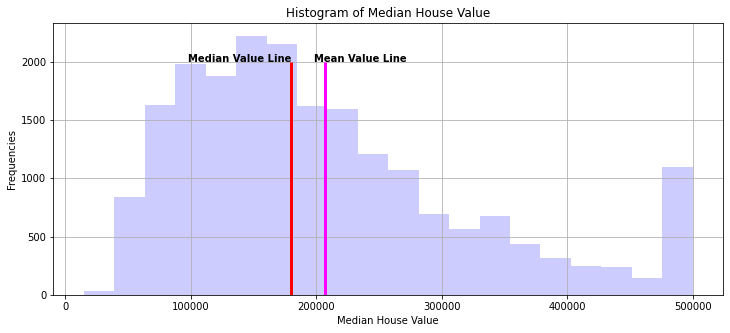

In [440]:
#explore the target variable -- median house value
plt.figure(1,figsize=(12,5))
plt.hist(df['median_house_value'],bins=20,histtype='stepfilled',color='blue',alpha=0.2)
plt.title('Histogram of Median House Value')
plt.ylabel('Frequencies')
plt.xlabel('Median House Value')
plt.grid(True)
#draw the median and mean value vertical line
plt.vlines(np.median(df['median_house_value']),0,2000,color='red',lw=3)
plt.text(180000,2000 , "Median Value Line", ha="right", weight="heavy")
plt.vlines(np.mean(df['median_house_value']),0,2000,color='magenta',lw=3)
plt.text(np.mean(df['median_house_value']+65000),2000 , "Mean Value Line", ha="right", weight="heavy")
#save the figure 
plt.savefig('Histogram Median House Value.png',dpi=300)
#show the figure
plt.show()

Observation from the plot:
- The price is right skewed. 
- The mean is higher than the median value
- There are a number of houses which have a max value of 500,000. Seems like a lot of houses were capped at this maximum value. 

<Figure size 720x504 with 0 Axes>

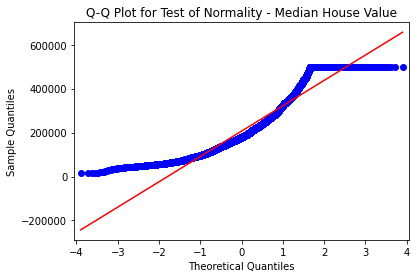

In [441]:
#test of normality of the target value
from statsmodels.graphics.gofplots import qqplot

plt.figure(1,figsize=(10,7))
qqplot(df['median_house_value'],line='s')
plt.title('Q-Q Plot for Test of Normality - Median House Value')
plt.savefig('NormalityTestRaw.png',dpi=300)
plt.show()

<Figure size 864x504 with 0 Axes>

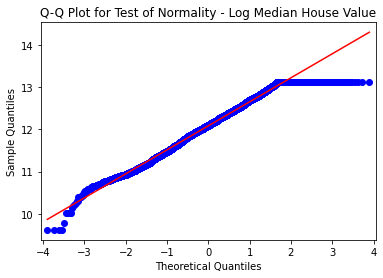

In [442]:
#test for normality after doing the log transformation
plt.figure(1,figsize=(12,7))
qqplot(np.log(df['median_house_value']),line='s')
plt.title('Q-Q Plot for Test of Normality - Log Median House Value')
plt.savefig('NormalitytestLog.png',dpi=300)
plt.show()

Observation from the Normality Plot
- The Median House Value without any transformation is not Normal 
- After the log transformation, the median house value becomes normal except that there is a caveat. This is visualized as the horizontal line. This is a constant set of values which will not allow the model to generalize well. 
- A good choice would be to drop these rows if these are a small percentage of the total dataset. 
- There are also a few outliers at the lower end of the price range. Initially these can be taken as part of the model training. Depending on the achieved performance, separate comparison can be done between the prediction and the actual values of these lower end prices house blocks. 

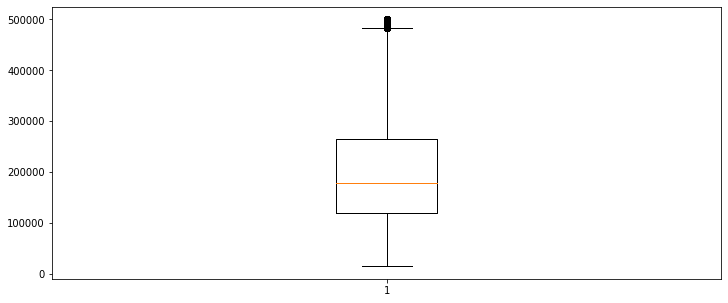

In [443]:
#create a box plot
plt.figure(1,figsize=(12,5))
plt.boxplot(df['median_house_value'])
plt.show()

Clearly the, 50,000 price point is an outlier. We can also plot on the log scale.

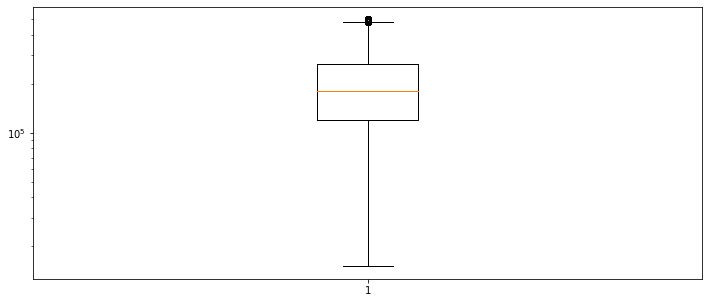

In [444]:
#plot the box plot on the y-scale
#create a box plot
plt.figure(1,figsize=(12,5))
plt.boxplot(df['median_house_value'])
plt.yscale('log')
plt.show()

### Pair Plot of all the features

[]

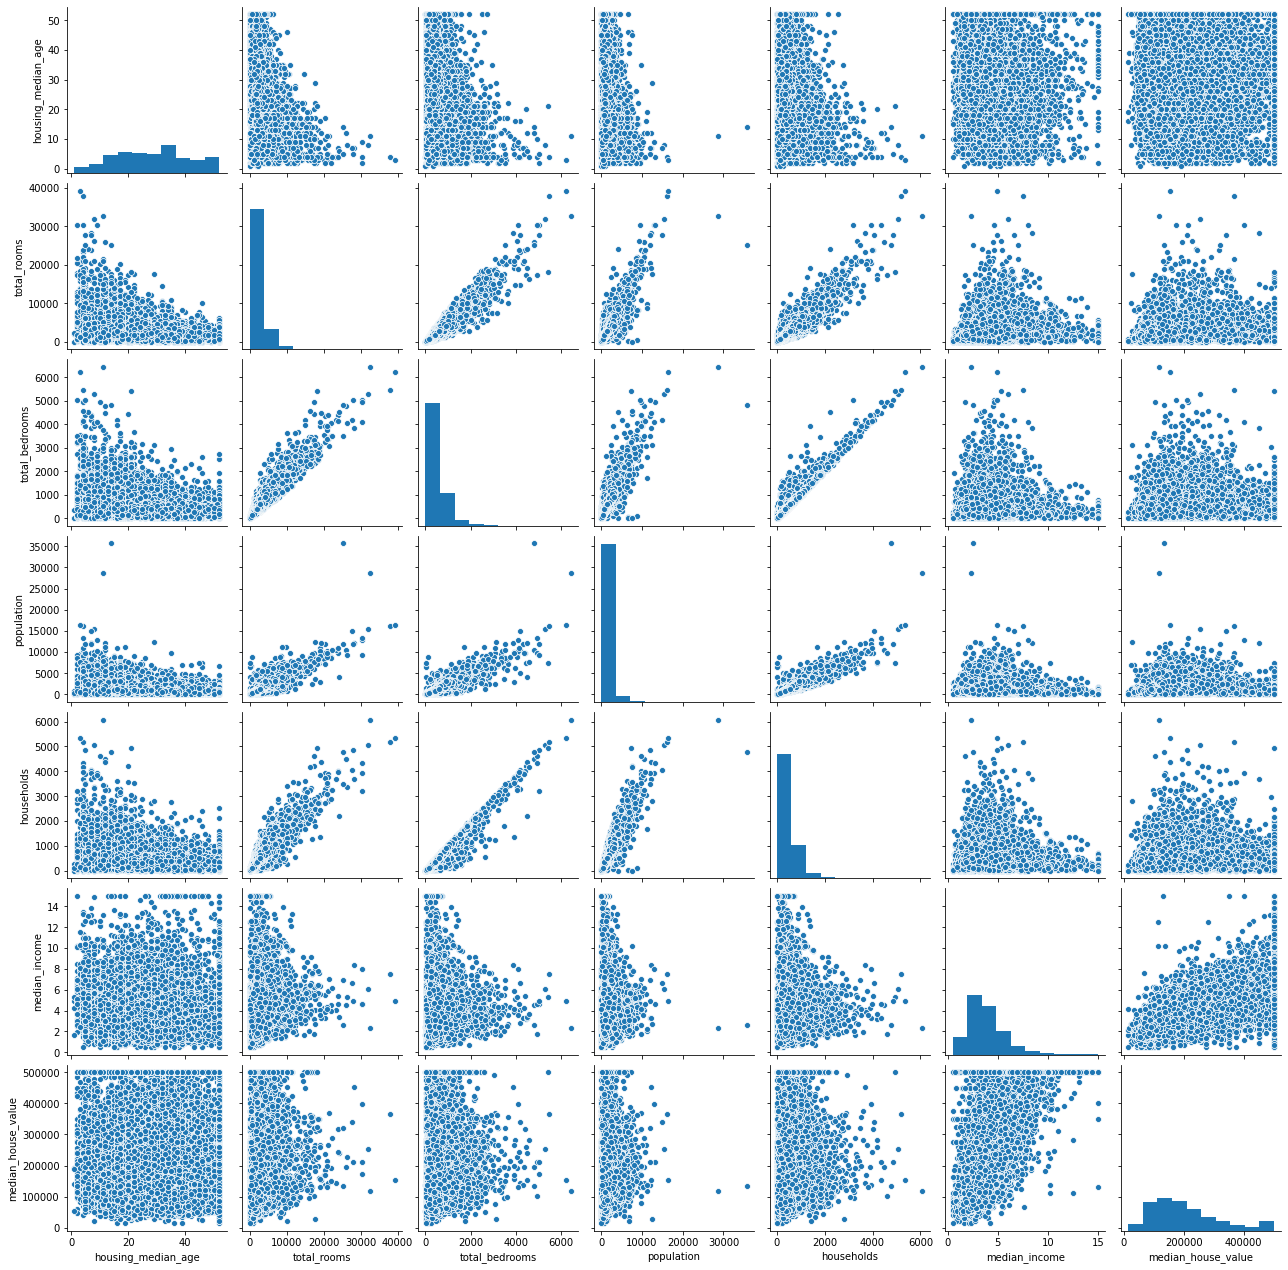

In [445]:
#create a pair plot with the continuous values
sns.pairplot(df[['housing_median_age', 'total_rooms','total_bedrooms','population', 'households', 'median_income',\
                 'median_house_value']],diag_kind='hist')
plt.savefig('PairPlot.png',dpi=300)
plt.plot()

Observation from the pair plot
- There is a strong correlation between median house value and median income
- The relationship is not very intuitive with the other variables
- There also seems to be a lot of correlation between some of the features. example households with population and total_bedrooms. 
- Total rooms and total bedrooms have high positive correlation. 

Feature engineering on these correlated features would be the key to come out with the selected features for modeling the house median value.

In [446]:
#check the correlation of the features with house median value
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

- As we see there is high positive correlation of median house value with median income. Median income of the block would be one of the most important feature for building the predictive model.
- The relationship with the proximity to the ocean is not represented as it is a categorical value. 
- The correlation with other features like total_bedrooms, total_rooms and housing_median_age is not very strong. 


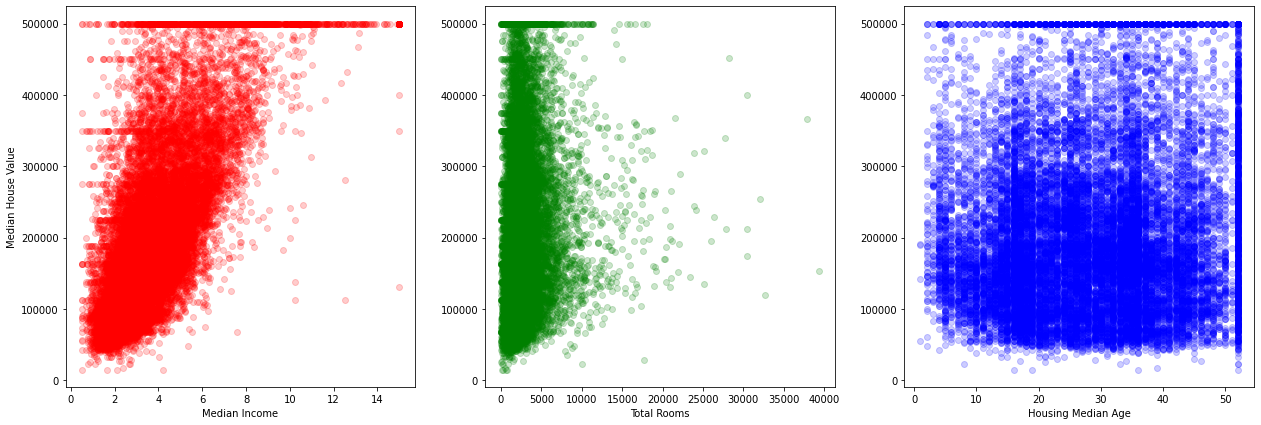

In [447]:
#scatter plot of median house value vs all the correlated features
plt.figure(figsize=(12,7))
plt.subplots_adjust(right=1.5)
plt.subplot(131)
plt.scatter(df['median_income'],df['median_house_value'],color='red',alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.subplot(132)
plt.scatter(df['total_rooms'],df['median_house_value'],color='green',alpha=0.2)
plt.xlabel('Total Rooms')
plt.subplot(133)
plt.scatter(df['housing_median_age'],df['median_house_value'],color='blue',alpha=0.2)
plt.xlabel('Housing Median Age')
plt.savefig('ScatterPlotAllFeatures.png',dpi=300)
plt.show()

### Histogram of all the features

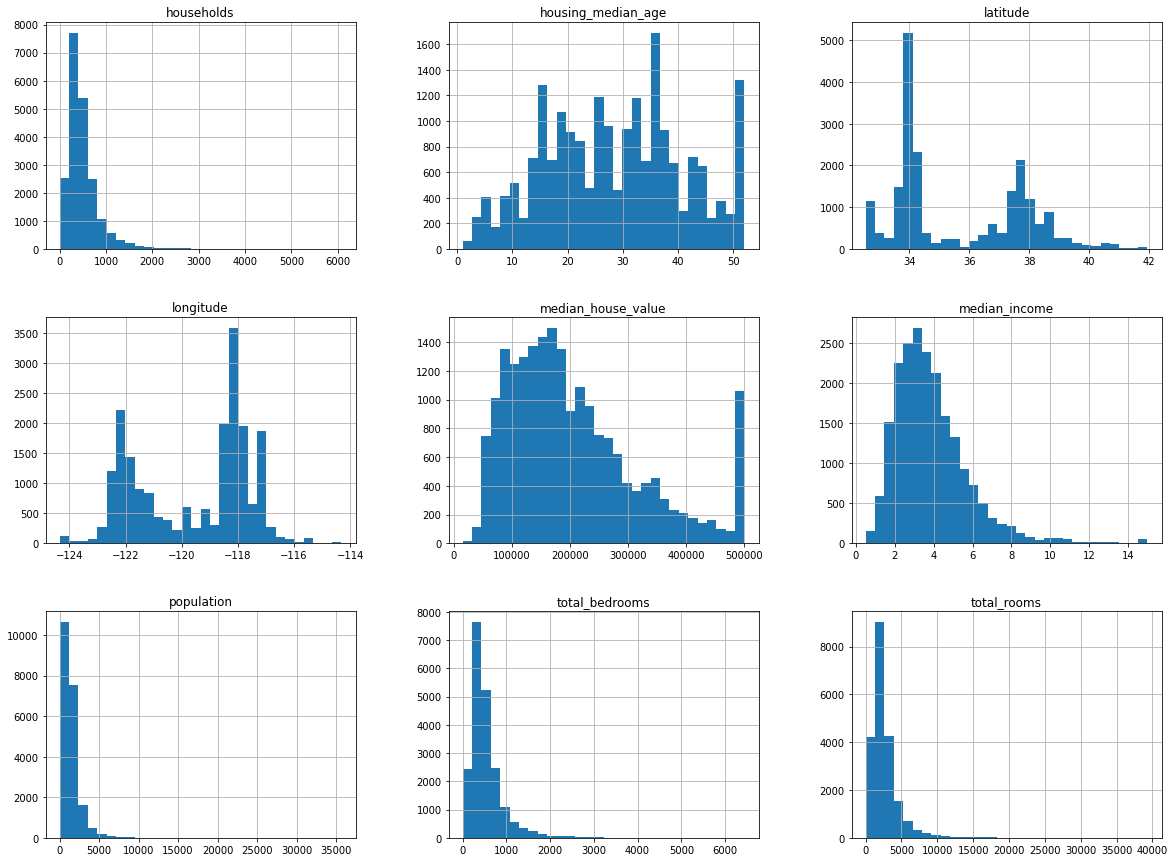

In [448]:
#plot the histogram of all features and target
df.hist(bins=30,figsize=(20,15)) #use of the pandas plotting capability
plt.savefig('HistogramOfAllFeatures.png',dpi=300)
plt.show()

Observation
- We can ignore the plot for longitude and latitude. These will be helpful for plotting the location on the map and check on proximity to the ocean
- The number of households are usually under the range of 1000
- The housing median age is well spread out between 0 to 50 years of age 
- Median income in the block is close to normal and is typically around 4 for most of the blocks. 
- There are 1000+ houses which have the maximum value of 500,000. May be these could be the houses which are capped at the maximum value. Exploring these houses would be the next steps.


### Houses whose median house value is ~500,000 USD
Histogram shows a lot of houses with this value.

In [449]:
df_max_price = df[df['median_house_value'] >= 500000]  

In [450]:
#view the top 10 rows of these houses
df_max_price.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
89,-122.27,37.80,52,249,78.0,396,85,1.2434,NEAR BAY,500001
459,-122.25,37.87,52,609,236.0,1349,250,1.1696,NEAR BAY,500001
493,-122.24,37.86,52,1668,225.0,517,214,7.8521,NEAR BAY,500001
494,-122.24,37.85,52,3726,474.0,1366,496,9.3959,NEAR BAY,500001
509,-122.23,37.83,52,2990,379.0,947,361,7.8772,NEAR BAY,500001
510,-122.22,37.82,39,2492,310.0,808,315,11.8603,NEAR BAY,500001
511,-122.22,37.82,42,2991,335.0,1018,335,13.4990,NEAR BAY,500001
512,-122.23,37.82,52,3242,366.0,1001,352,12.2138,NEAR BAY,500001
514,-122.23,37.82,52,3494,396.0,1192,383,12.3804,NEAR BAY,500001
517,-122.23,37.82,52,1611,203.0,556,179,8.7477,NEAR BAY,500001


In [451]:
#check the ocean proximity of these houses
df_max_price['ocean_proximity'].value_counts()

<1H OCEAN     541
NEAR OCEAN    221
NEAR BAY      202
INLAND         28
Name: ocean_proximity, dtype: int64

Clearly, these expensive houses are the ones which are very close to the ocean (max 1 hour to the ocean) The number of inland houses are very few. 

In [452]:
#view the top 10 rows of these houses
df_max_price.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20326,-118.96,34.30,16,3103,482.0,1567,467,6.9070,<1H OCEAN,500001
20335,-118.94,34.24,5,10018,1233.0,4253,1120,8.9063,<1H OCEAN,500001
20367,-118.94,34.16,3,1170,148.0,493,142,8.0428,<1H OCEAN,500001
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,NEAR OCEAN,500001
20389,-118.90,34.19,26,1582,196.0,573,182,10.0595,<1H OCEAN,500001
20422,-118.90,34.14,35,1503,263.0,576,216,5.1457,<1H OCEAN,500001
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,<1H OCEAN,500001
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,<1H OCEAN,500001
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,<1H OCEAN,500001
20443,-118.85,34.27,50,187,33.0,130,35,3.3438,<1H OCEAN,500001


In [453]:
df_max_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,992.000000,992.000000,992.000000,992.000000,985.000000,992.000000,992.000000,992.000000,992.000000
mean,-119.714808,35.235514,33.916331,2941.285282,502.819289,1110.717742,466.803427,7.718279,500000.972782
std,1.954213,1.789526,13.031440,2144.906809,396.198095,809.597160,359.277806,3.270615,0.162799
min,-122.640000,32.680000,2.000000,8.000000,1.000000,13.000000,1.000000,0.499900,500000.000000
25%,-122.120000,33.977500,25.000000,1662.500000,269.000000,635.750000,253.000000,5.112825,500001.000000
50%,-118.480000,34.130000,34.000000,2501.000000,403.000000,925.500000,375.000000,7.562450,500001.000000
75%,-118.320000,37.402500,45.000000,3532.750000,610.000000,1338.750000,577.000000,10.074725,500001.000000
max,-116.430000,38.910000,52.000000,18132.000000,5419.000000,7431.000000,4930.000000,15.000100,500001.000000


- There are 992 houses with the same median house value !! That is roughly 5% of the entire data size. 
- Natural question is why all these houses have exactly the same price. This can only be confirmed by the people associated with generating the data. 

In [454]:
df_max_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 89 to 20443
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           992 non-null    float64
 1   latitude            992 non-null    float64
 2   housing_median_age  992 non-null    int64  
 3   total_rooms         992 non-null    int64  
 4   total_bedrooms      985 non-null    float64
 5   population          992 non-null    int64  
 6   households          992 non-null    int64  
 7   median_income       992 non-null    float64
 8   ocean_proximity     992 non-null    object 
 9   median_house_value  992 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 85.2+ KB


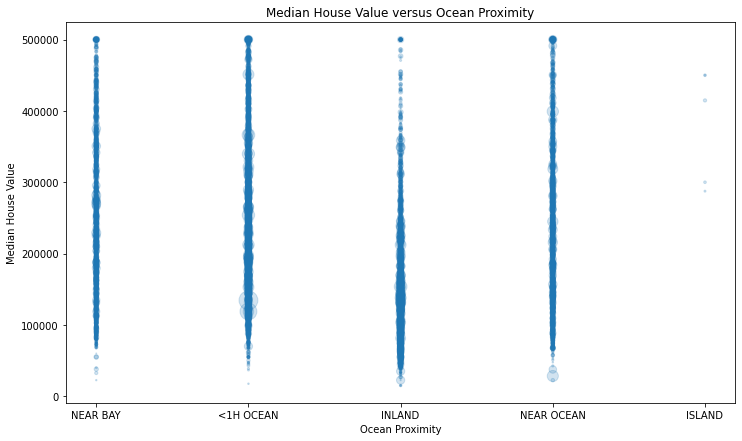

In [455]:
plt.figure(figsize=(12,7))
plt.scatter(df['ocean_proximity'],df['median_house_value'],s=df['population']/100,alpha=0.2)
plt.title('Median House Value versus Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
#save the figure
plt.savefig('HouseValueOceanProximity.png',dpi=300)
plt.show()

Observation from the scatter plot 
- The key reading from the plot is that houses closer to ocean proximity are well distributed in terms of the median house value. Secondly, there are very few houses which are on an Island.
- We can check how many houses are on the island.

In [456]:
#check the number of blocks per ocean proximity feature column
df['ocean_proximity'].value_counts().sort_values(ascending=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- We have only 5 blocks on island. It is a very small number and unless we attempt to upsample this class of houses, the model most likely miss out on having a good representation of houses on island to predict their prices. 

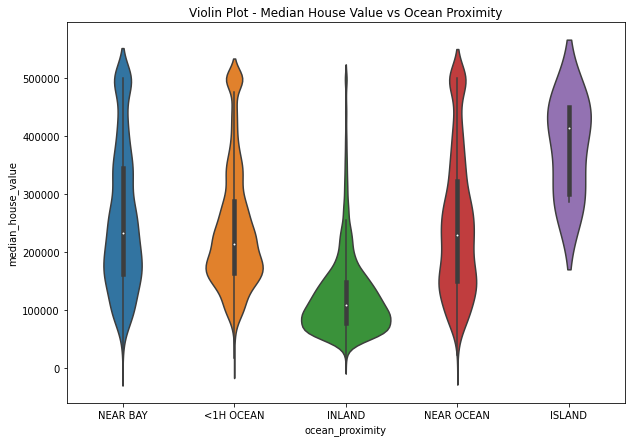

In [457]:
#visualize the above scatter plot using seaborn's violin plot
plt.figure(figsize=(10,7))
sns.violinplot(df['ocean_proximity'],df['median_house_value'],s=df['population']/100,alpha=0.2)
plt.title('Violin Plot - Median House Value vs Ocean Proximity')
plt.savefig('ViolinPlot.png',dpi=300)
plt.show()

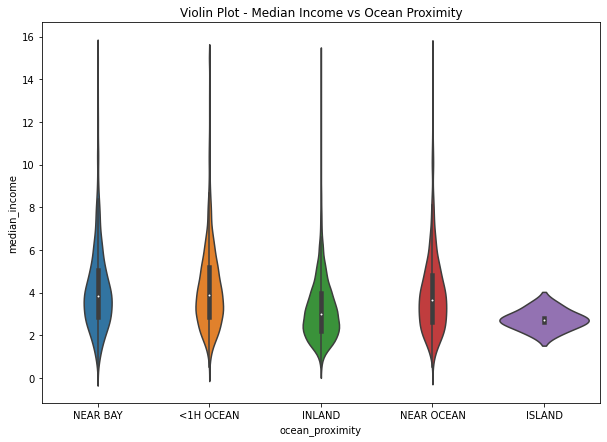

In [458]:
#violin plot of median income and ocean proximity
plt.figure(figsize=(10,7))
sns.violinplot(df['ocean_proximity'],df['median_income'],s=df['population']/100,alpha=0.2)
plt.title('Violin Plot - Median Income vs Ocean Proximity')
plt.savefig('ViolinPlotMedianIncome.png',dpi=300)
plt.show()

### Visualise the house prices 
We can use the longitude and latitude values for plotting


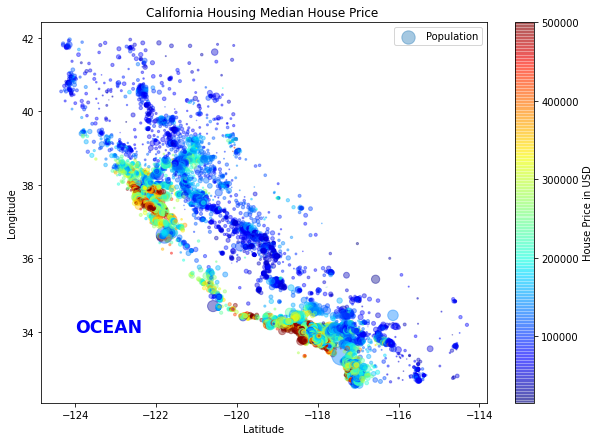

In [459]:
plt.figure(figsize=(10,7))
plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.4,cmap=plt.get_cmap('jet'),c=df['median_house_value'],
           s=df['population']/100,label='Population')
plt.legend()
plt.colorbar(label='House Price in USD')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.text(-124,34,'OCEAN',weight='heavy',size='xx-large',color='blue')
plt.title('California Housing Median House Price ')
plt.savefig('HousingPriceperPopulation.png',dpi=300)
plt.show()

- The highly priced houses are near the coastline. We cannot make it out from the above plot unless data is plotted using one of the California map image. The deep red ones are closest to the ocean and some of them are on islands. 

In [460]:
#group by ocean proximity and check the median house value
df.groupby('ocean_proximity')['median_house_value'].apply(np.median).sort_values(ascending=False)

ocean_proximity
ISLAND        414700.0
NEAR BAY      233800.0
NEAR OCEAN    229450.0
<1H OCEAN     214850.0
INLAND        108500.0
Name: median_house_value, dtype: float64

In [461]:
#group by ocean proximity and check the mean house value
df.groupby('ocean_proximity')['median_house_value'].apply(np.mean).sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

- The median house value of all blocks on the island is above 400,000 USD
- INLAND is the cheapest
- Rest all others have closer median values


### Summary from Exploratory Data Analysis
- total_bedrooms is the only feature which has missing values. None of these missing values belong to those blocks where the prices are over 500,000 USD.
- Roughly 5% of the data or 992 rows have exactly the same highest prices 500,000 or 500,001 USD. Mostly these belong to the houses which have closer proximity to the ocean. Only 28 out of these 992 blocks belong to the INLAND areas. It is good to check why these have exactly the same price and whether there was any constraint or decision taken to mark these prices. For training the model, it is better to drop these 992 rows of data. These are only 5% of the total dataset size. 
- There are only 5 blocks on Islands and the median prices of these are well above 400,000 USD.It would be better to drop these values from the dataset as these can be very well be treated as outliers. 
- There is high positive correlation between median income and median house value. Other positive correlations exists with total bedrooms, total rooms and housing median age but these are not as strong as seen with median income. 
- There is high correlation (multicollinearity) between total rooms and total bedrooms. It is better to either drop one of these or combine them into a single feature to build the model. 
- People with higher median income prefer to buy houses in blocks closer to the ocean proximity. 
- The scale of the values of the features are very different. 



## Data Cleaning
- Remove the outliers, especially the ones which have a constant median house value of USD 500000 or 500000
- Impute the missing values in total_bedrooms
- Standardize the dataset values across all features. 
- One hot endcode the categorical feature -- > ocean_proximity

### Remove the ~500000 priced houses

In [462]:
#creat a copy of the original df
df_clean = df.copy()

In [463]:
#drop the rows corresponding to the indices of the df_max_price which contains all extreme values
df_clean.drop(index=df_max_price.index.tolist(), inplace=True)

In [464]:
#check length of the new df, should be lesser by 992
len(df_clean)

19648

In [465]:
#check whether we still have those row values --> an empty dataframe should be returned
df_clean[df_clean['median_house_value']>=500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


<Figure size 720x504 with 0 Axes>

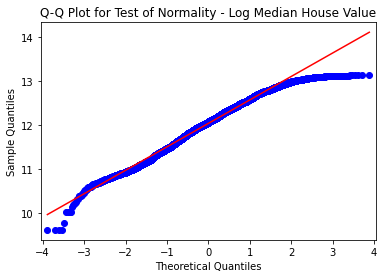

In [466]:
#plot the normality plot on the df_clean
plt.figure(1,figsize=(10,7))
qqplot(np.log(df_clean['median_house_value']),line='s')
plt.title('Q-Q Plot for Test of Normality - Log Median House Value')
plt.show()

There are still some values falling off the normal line. However, we will continue with this reduced dataset which is 95% of the original. 

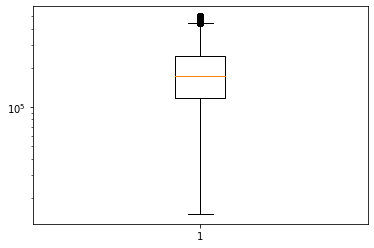

In [467]:
#visualize the box plot on the log scale
plt.boxplot(df_clean['median_house_value'])
plt.yscale('log')
plt.show()

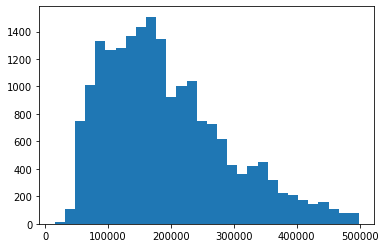

In [468]:
plt.hist(df_clean['median_house_value'],bins=30)
#plt.yscale('log')
plt.show()

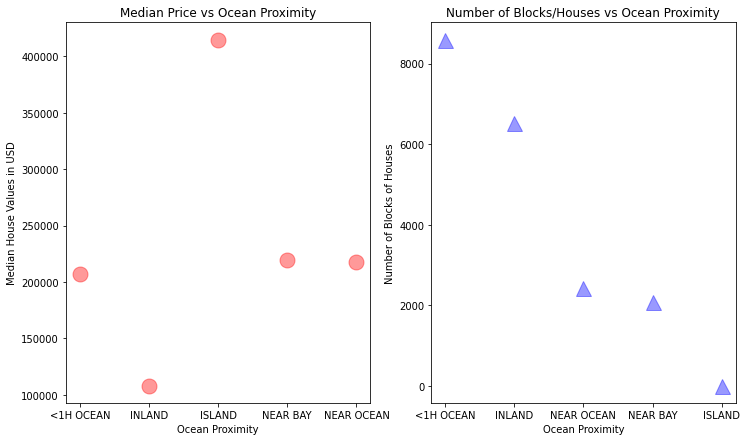

In [469]:
#visualize the median price per ocean proximity
plt.figure(figsize=(12,7))

plt.subplot(121)
plt.plot(df_clean.groupby('ocean_proximity')['median_house_value'].apply(np.median),'ro',
         markersize=15,alpha=0.4)
plt.title('Median Price vs Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Values in USD')

plt.subplot(122)
plt.plot(df_clean['ocean_proximity'].value_counts(),'bo',markersize=15,alpha=0.4,marker='^')
plt.ylabel('Number of Blocks of Houses')
plt.xlabel('Ocean Proximity')
plt.title('Number of Blocks/Houses vs Ocean Proximity')
plt.show()

To re-emphasize, the number of houses in ISLAND is very less (only 5) annd have very high priced median house values. While it would be better to drop these rows as well. In the context of the problem of the project and for curosity whether the model can generalize well or not, I will continue to retain these values.

### Impute the missing values in total_bedrooms

In [470]:
#import the library
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [471]:
imputer = SimpleImputer(strategy='mean')
encoder = LabelEncoder()

In [472]:
df_clean['enc_ocean_proximity'] = encoder.fit_transform(df_clean['ocean_proximity'])

In [473]:
#drop the redundant ocean_proximity column
df_clean.drop('ocean_proximity',axis=1,inplace=True)

In [474]:
df_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'enc_ocean_proximity'],
      dtype='object')

In [475]:
df_clean['enc_ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [476]:
df_clean['enc_ocean_proximity'].value_counts()

0    8595
1    6523
4    2437
3    2088
2       5
Name: enc_ocean_proximity, dtype: int64

In [477]:
df_clean.info() #see that encoded values are no more object but of type int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            19648 non-null  float64
 1   latitude             19648 non-null  float64
 2   housing_median_age   19648 non-null  int64  
 3   total_rooms          19648 non-null  int64  
 4   total_bedrooms       19448 non-null  float64
 5   population           19648 non-null  int64  
 6   households           19648 non-null  int64  
 7   median_income        19648 non-null  float64
 8   median_house_value   19648 non-null  int64  
 9   enc_ocean_proximity  19648 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [478]:
#check a few samples of the missing rows
sample_missing_rows = df_clean[df_clean.isnull().any(axis=1)].head()

In [479]:
sample_missing_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,enc_ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,3
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,3
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,3
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,3
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,3


In [480]:
imputer.fit(df_clean)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [481]:
imputer.statistics_

array([-1.19562378e+02,  3.56518725e+01,  2.83730660e+01,  2.62033769e+03,
        5.39645825e+02,  1.44136849e+03,  5.01192488e+02,  3.67641067e+00,
        1.92055329e+05,  1.14744503e+00])

In [482]:
dataset = imputer.transform(df_clean)

In [483]:
#create the dataframe once again
housing = pd.DataFrame(data=dataset,columns=df_clean.columns,index=df_clean.index)

In [484]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,enc_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [485]:
#check the info and observe that there won't be any missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            19648 non-null  float64
 1   latitude             19648 non-null  float64
 2   housing_median_age   19648 non-null  float64
 3   total_rooms          19648 non-null  float64
 4   total_bedrooms       19648 non-null  float64
 5   population           19648 non-null  float64
 6   households           19648 non-null  float64
 7   median_income        19648 non-null  float64
 8   median_house_value   19648 non-null  float64
 9   enc_ocean_proximity  19648 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


## Feature Engineering


In [486]:
#add a new feature based on total_bedrooms and total_rooms which are heavily correlated
housing['rooms_per_bedrooms'] = housing['total_rooms']/housing['total_bedrooms']

In [487]:
#lets check the correlation of median house value with rooms per bedrooms
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.646719
rooms_per_bedrooms     0.317935
total_rooms            0.144988
households             0.095634
total_bedrooms         0.074823
housing_median_age     0.065139
enc_ocean_proximity    0.061920
population             0.013592
longitude             -0.045733
latitude              -0.149257
Name: median_house_value, dtype: float64

- So now the correlation is much stronger. We can get rid of the total_rooms and total_bedrooms features.

In [488]:
housing.drop(['total_bedrooms','total_rooms'], axis=1,inplace=True)

In [489]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'households', 'median_income', 'median_house_value',
       'enc_ocean_proximity', 'rooms_per_bedrooms'],
      dtype='object')

In [490]:
housing.head(2)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,enc_ocean_proximity,rooms_per_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,3.0,6.821705
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,3.0,6.418626


In [491]:
#rearrange the columns -- > shifting the target to extreme end. 
housing = housing[['longitude', 'latitude', 'housing_median_age', 'population',
                   'households', 'median_income','enc_ocean_proximity', 'rooms_per_bedrooms','median_house_value']]

In [492]:
housing.head(2)

,longitude,latitude,housing_median_age,population,households,median_income,enc_ocean_proximity,rooms_per_bedrooms,median_house_value
0,-122.23,37.88,41.0,322.0,126.0,8.3252,3.0,6.821705,452600.0
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,3.0,6.418626,358500.0


In [493]:
#check the correlation of households and other features
housing.corr()['households'].sort_values(ascending=False)

households             1.000000
population             0.909090
median_house_value     0.095634
longitude              0.055745
median_income          0.046275
enc_ocean_proximity   -0.016616
rooms_per_bedrooms    -0.022664
latitude              -0.072854
housing_median_age    -0.309633
Name: households, dtype: float64

In [494]:
#create a new feature households_per_population
housing['population_per_households'] = housing['population']/housing['households']

In [495]:
housing.head(2)

,longitude,latitude,housing_median_age,population,households,median_income,enc_ocean_proximity,rooms_per_bedrooms,median_house_value,population_per_households
0,-122.23,37.88,41.0,322.0,126.0,8.3252,3.0,6.821705,452600.0,2.555556
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,3.0,6.418626,358500.0,2.109842


In [496]:
housing.drop(['households','population'], axis=1,inplace=True)

In [497]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'enc_ocean_proximity', 'rooms_per_bedrooms', 'median_house_value',
       'population_per_households'],
      dtype='object')

In [498]:
df_housing =  housing[['longitude', 'latitude', 'housing_median_age', 'median_income',
                       'enc_ocean_proximity', 'rooms_per_bedrooms','population_per_households','median_house_value']]

In [499]:
df_housing.head(3)

,longitude,latitude,housing_median_age,median_income,enc_ocean_proximity,rooms_per_bedrooms,population_per_households,median_house_value
0,-122.23,37.88,41.0,8.3252,3.0,6.821705,2.555556,452600.0
1,-122.22,37.86,21.0,8.3014,3.0,6.418626,2.109842,358500.0
2,-122.24,37.85,52.0,7.2574,3.0,7.721053,2.802260,352100.0


In [500]:
#drop housing median age as it is not well correlated. better is to run a hypothesis test
df_housing.drop('housing_median_age',axis=1,inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [501]:
df_housing.head(3)

,longitude,latitude,median_income,enc_ocean_proximity,rooms_per_bedrooms,population_per_households,median_house_value
0,-122.23,37.88,8.3252,3.0,6.821705,2.555556,452600.0
1,-122.22,37.86,8.3014,3.0,6.418626,2.109842,358500.0
2,-122.24,37.85,7.2574,3.0,7.721053,2.802260,352100.0


In [502]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  19648 non-null  float64
 1   latitude                   19648 non-null  float64
 2   median_income              19648 non-null  float64
 3   enc_ocean_proximity        19648 non-null  float64
 4   rooms_per_bedrooms         19648 non-null  float64
 5   population_per_households  19648 non-null  float64
 6   median_house_value         19648 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


## Split the dataset

In [503]:
dataset = df_housing.values
dataset.shape

(19648, 7)

In [504]:
#Split into input X and output y
X = dataset[:,:6]
y = dataset[:,6]

In [505]:
#import the library
from sklearn.model_selection import train_test_split

In [506]:
#split the dataset into training and test dataset
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=42)

In [507]:
#check the shape after splitting
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15718, 6) (3930, 6) (15718,) (3930,)


In [508]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [509]:
#standardized the train and test dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [510]:
#apply log transformation on the target value
y_train = np.log(y_train)
y_test = np.log(y_test)

## Linear Regression - Multiple Features 
The assigment asks to apply Linear Regression. The log transformation of the target variable would make the y_train Gaussian. Also explored in the EDA section.

In [511]:
#import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [512]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)

In [513]:
lin_reg = LinearRegression()

In [514]:
#cross validate and check the scores on 10-fold splits
scores = cross_val_score(lin_reg,X_train,y_train,cv=cv,scoring='neg_mean_squared_error',
                         verbose=0)

In [515]:
#convert the scores to positive
scores = abs(scores)

In [516]:
scores

array([0.11353105, 0.10684872, 0.11133514, 0.11926788, 0.10603375,
       0.10569433, 0.1105779 , 0.11521642, 0.10832247, 0.11869981])

In [517]:
#check the mean scores --> these are still on the log transformation of median house value
np.mean(scores)

0.11155274729021918

In [518]:
#fit the plain linear regression model
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [519]:
#retrieve the coefficients
lin_reg.coef_

array([-0.5233525 , -0.55118186,  0.35644119, -0.00497919, -0.08455186,
       -0.01811458])

In [520]:
#retrieve the intercept
lin_reg.intercept_

12.03289677619971

In [521]:
#create predictions
y_pred = lin_reg.predict(X_test)

In [522]:
#do the inverse transformation -- > equivalent to pre log transformed values
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

In [523]:
#Model evaluation metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [524]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [525]:
print('Mean Squared Error = %.2f' %(mse))
print('Mean Absolute Error = %.2f' %(mae))
print('Root Mean Squared Error = %.2f' %(np.sqrt(mse)))

Mean Squared Error = 5118928636.66
Mean Absolute Error = 47213.60
Root Mean Squared Error = 71546.69


In [526]:
#Mean Value of y_test
np.mean(y_test)

192063.6893129771

In [527]:
y_pred

array([257532.60120376, 244755.19384905, 295774.83954343, ...,
       121673.22775458, 134986.86454796, 274399.57767736])

In [528]:
print('Mean Predicted Price $',(np.mean(y_pred)))
print('Mean Actual Price $',(np.mean(y_test)))

Mean Predicted Price $ 183830.5233596158
Mean Actual Price $ 192063.6893129771


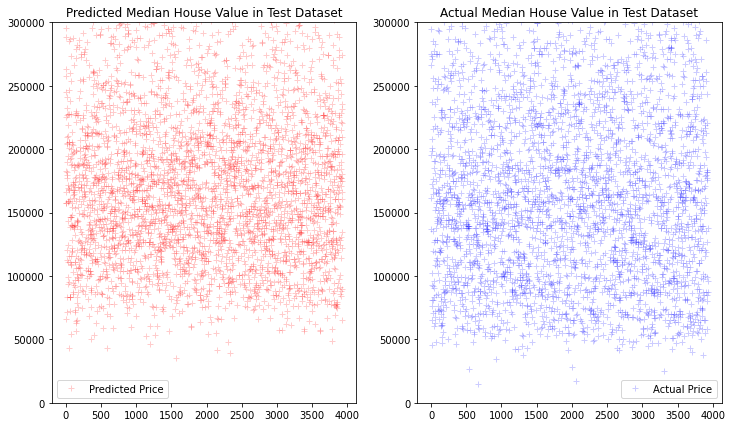

In [529]:
plt.figure(1,figsize=(12,7))
plt.subplot(121)
plt.plot(y_pred,'r+',label='Predicted Price',alpha=0.2)
plt.ylim(0,300000)
plt.legend()
plt.title('Predicted Median House Value in Test Dataset')
plt.subplot(122)
plt.plot(y_test,'b+',label='Actual Price',alpha=0.2)
plt.ylim(0,300000)
plt.title('Actual Median House Value in Test Dataset')
plt.legend()
plt.savefig('PredvsActual.png',dpi=300)
plt.show()

## Summary
The MAE and RMSE is roughly 1-fourth of the mean of test data. The Linear regression model did pretty well in its prediction. 
The graph shows the comparison of the predicted and the actual median house value in the test dataset. Surprisingly, the model is predicting prices well beyond 500000 USD and also a single instance where it predicts beyond 600000. This could have been taken care by dropping the ISLAND blocks from the dataset and also by dealing with the outliers more strictly. Another way is to train the linear model multiple times and determine the prediction interval rather than the point estimate.
### Further improvement of the project
- Use Power Transformer with method yeo-johnson as there are negative values in Longitude. Standard Scaler assumes that the independent values are normal which is not the case. 
- Use different models (SGD Regressor with Ridge/Lasso penalty),SVM Regressor
- A lot can be improved with further data cleaning: Leaving out ISLAND block or even having a separate model for higher valued houses near the ocean area. 
- Provide an interval prediction rather than point estimate. Will apply this for ML course projects!!



## Bonus Exercise: Linear Regression - Using only Median Income feature

In [530]:
X = dataset[:,2]
y = dataset[:,6]
#split the dataset into training and test dataset
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=42)

In [531]:
model = LinearRegression()

In [532]:
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [533]:
#create predictions
y_pred_1 = model.predict(X_test.reshape(-1,1))

In [534]:
mse = mean_squared_error(y_test,y_pred_1)
mae = mean_absolute_error(y_test,y_pred_1)

In [535]:
print('Mean Squared Error %.2f'%(mse))
print('Mean Absolute Error %.2f'%(mae))
print('Root Mean Squared Error %.2f'%(np.sqrt(mse)))

Mean Squared Error 5649550993.96
Mean Absolute Error 57279.60
Root Mean Squared Error 75163.50


### Conclusion:
- The model with multiple features (feature engineering) performs better than the model with only the median income as the feature. 
- Median Income however, is one of the strongest predictor. 
  
